<a href="https://colab.research.google.com/github/PaVasForce/myForce/blob/master/keras_course_cnn.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<table>
<td>
<img src="https://people.iee.ihu.gr/~kdiamant/images/kdiamantaras2.jpg" alt="Kostas Diamantaras" height="100"/>
</td>
<td>
<p>Konstantinos Diamantaras</p>
<p>Department of Information and Electronic Engineering</p>  
<p>International Hellenic University</p>  
<p>Greece</p>
</td>
<td>
<img src="https://people.iee.ihu.gr/~kdiamant/images/International_Hellenic_University_logo.jpg" alt="Kostas Diamantaras" height="100"/>
</td>
</table>

# Implement a simple Convolutional NN model  
<ul>
<li> Use layers: <code>Input</code>, <code>Dense</code>, <code>Flatten</code>, <code>Conv2D</code>, <code>Activation</code>, <code>BatchNormalization</code>, <code>AveragePooling2D</code></li>
<li> Build and train the model</li>
<li> Predict test patterns</li>
<li> Dataset: <a href="https://www.cs.toronto.edu/~kriz/cifar.html">CIFAR10</a></li>
</ul>

#### **Read CIFAR10 image dataset**

In [ ]:
import tensorflow as tf
from tensorflow.keras.datasets import cifar10

(xo_train, t_train), (xo_test, t_test) = cifar10.load_data()

print('Train image data {}'.format(xo_train.shape))
print('Test image data {}'.format(xo_test.shape))
print('Train labels {}'.format(t_train.shape))
print('Test labels {}'.format(t_test.shape))

170500096/170498071 [==============================] - 6s 0us/step
Train image data (50000, 32, 32, 3)
Test image data (10000, 32, 32, 3)
Train labels (50000, 1)
Test labels (10000, 1)


Some example images with labels

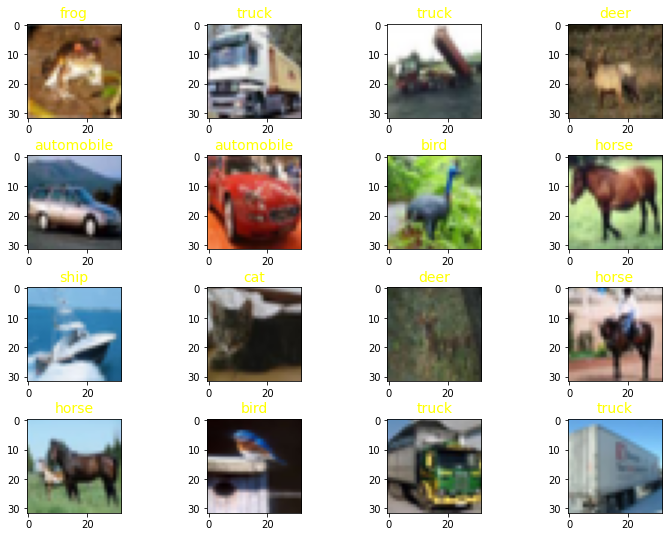

In [ ]:
import matplotlib.pyplot as plt

class_names = ['airplane','automobile','bird','cat','deer','dog','frog','horse','ship','truck']
plt.figure(figsize=(12,9))
plt.subplots_adjust(wspace=0.4, hspace=0.4)
for i in range(16):
    axes = plt.subplot(4,4,i+1)
    axes.set_title(class_names[t_train[i,0]], fontdict={'fontsize':14, 'color':'yellow'})
    plt.imshow(xo_train[i])

Do some preprocessing of the data.  
`input_shape` = [32,32,3] is the shape of one input sample, ie. 3 images (the Red/Green/Blue components) each one with size 32x32.  
Also normalize the images dividing by 255 (so all values are between -1, 1) and then subtract the mean pixel value 

In [ ]:
import numpy as np

# number of classes
num_classes = 10

# Input image dimensions.
input_shape = xo_train.shape[1:]    # (32,32,3)

# Normalize data.
x_train = xo_train.astype('float32') / 255.0
x_test = xo_test.astype('float32') / 255.0

# Subtract pixel mean
x_train_mean = np.mean(x_train, axis=0)
x_train -= x_train_mean
x_test -= x_train_mean

#### Build a Convolutional neural network (CNN)

In [ ]:
from tensorflow.keras.layers import Input

x_in = Input(shape=input_shape)

#### Conv2D layer (see [Convolutional layers](https://keras.io/layers/convolutional/))  
The Conv2D layer implements a 2d Convolutional layer.  

<table><tr>
<td>
<img src="https://people.iee.ihu.gr/~kdiamant/images/Convolution2D.png" alt="Dense layer" width="300"/>
</td>
<td width="250">
<p>$\mathbf{y}_i = f( \sum_j k_{ij} * \mathbf{x}_j + b_i )$</p>
<p>$\mathbf{x}_j$: $j$-th output image</p>
<p>$\mathbf{y}_i$: $i$-th output image</p>
<p>$*$: convolution operation</p>
<p>$k_i$: $i$-th kernel filter</p>
<p>$b_i$: $i$-th bias</p>
<p>$f$: activation function</p>
</td></tr>
</table>

It assumes that the input `x` is a 4-d tensor with shape `(None,height,width,num_channels)`.
As usual, the first dimension is unspecified because it corresponds to the unknown `batch_size`.
You may specify the inputs shape using the parameter `input_shape=(height,width,num_channels)`
but you can skip this parameter if you specify the input tensor `x` in which case the input shape will be infered from it.  
Mandatory parameters:  
* `filters` = number of kernel filters to be used to produce output images
* `kernel_size` = the size of the receptive field of each kernel filter. It is either an integer n, in which case the kernel size is assumed to be n$\times$n, or it is a tuple (n1,n2)  

Some important optional parameters:  
* `padding` = one of `"valid"` or `"same"`.
The value `"valid"` (default) means that no padding is done to the input images so the output images will have size (`height-kernel_size+1`)$\times$(`width-kernel_size+1`).
The value `"same"` means that the input images are padded with the necessary zeros so that the output images will have the same size as the inputs, ie. `height`$\times$`width`.
* `strides` = the stride step along image directions x and y. It can be an integer s, in which case the strides are assumed to be s in both direction, or it is a tuple (s1,s2). The default value is 1.  
* `activation` = the activation function of the neurons. The default activation is linear.  
For example:  

In [ ]:
from tensorflow.keras.layers import Conv2D, Dense, Reshape, Flatten

#First Convolutional layer
x = Conv2D(filters=16, kernel_size=3,
           activation='relu',
           padding="same")(x_in)
print(x.shape)  # Ouput x has 16 images of same shape as the input, ie 32x32

(None, 32, 32, 16)


Add more layers to the network

In [ ]:
#Second Convolutional layer
x = Conv2D(filters=20, kernel_size=3,
           activation='relu',
           padding="same")(x)
#Third Convolutional layer
x = Conv2D(filters=32, kernel_size=3,
           activation='relu',
           padding="same")(x)
# Flatten the data
x = Flatten()(x)
print(x.shape)
# Output fully connected layer with softmax activation
out = Dense(num_classes, activation='softmax')(x)

(None, 32768)


#### Build the keras [Model](https://keras.io/models/model/)  

In [ ]:
from tensorflow.keras.models import Model
from tensorflow.keras.losses import sparse_categorical_crossentropy
from tensorflow.keras.optimizers import Adam

model = Model(inputs=x_in, outputs=out)
lr = 1e-3   # Learning rate
model.compile(loss='sparse_categorical_crossentropy',
              optimizer=Adam(lr=lr),
              metrics=['accuracy'])
model.summary()

Model: "model"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 32, 32, 3)]       0         
_________________________________________________________________
conv2d (Conv2D)              (None, 32, 32, 16)        448       
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 32, 32, 20)        2900      
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 32, 32, 32)        5792      
_________________________________________________________________
flatten (Flatten)            (None, 32768)             0         
_________________________________________________________________
dense (Dense)                (None, 10)                327690    
Total params: 336,830
Trainable params: 336,830
Non-trainable params: 0
_______________________________________________________

#### Train the model  

In [ ]:
max_epochs = 30
batch_size = 32

history = model.fit(x=x_train, y=t_train,
                    validation_data=(x_test,t_test),
                    batch_size=batch_size,
                    epochs=max_epochs,
                    verbose=1)

Epoch 1/30
1563/1563 [==============================] - 7s 5ms/step - loss: 1.3229 - accuracy: 0.5325 - val_loss: 1.0740 - val_accuracy: 0.6217
Epoch 2/30
1563/1563 [==============================] - 7s 4ms/step - loss: 0.9297 - accuracy: 0.6771 - val_loss: 1.0038 - val_accuracy: 0.6545
Epoch 3/30
1563/1563 [==============================] - 7s 4ms/step - loss: 0.7387 - accuracy: 0.7462 - val_loss: 0.9772 - val_accuracy: 0.6655
Epoch 4/30
1563/1563 [==============================] - 7s 4ms/step - loss: 0.5640 - accuracy: 0.8069 - val_loss: 1.0702 - val_accuracy: 0.6600
Epoch 5/30
1563/1563 [==============================] - 7s 5ms/step - loss: 0.4052 - accuracy: 0.8613 - val_loss: 1.1896 - val_accuracy: 0.6489
Epoch 6/30
1563/1563 [==============================] - 7s 5ms/step - loss: 0.2729 - accuracy: 0.9066 - val_loss: 1.5060 - val_accuracy: 0.6409
Epoch 7/30
1563/1563 [==============================] - 7s 4ms/step - loss: 0.1868 - accuracy: 0.9357 - val_loss: 1.7637 - val_accuracy:

#### Plot the training and testing behavior

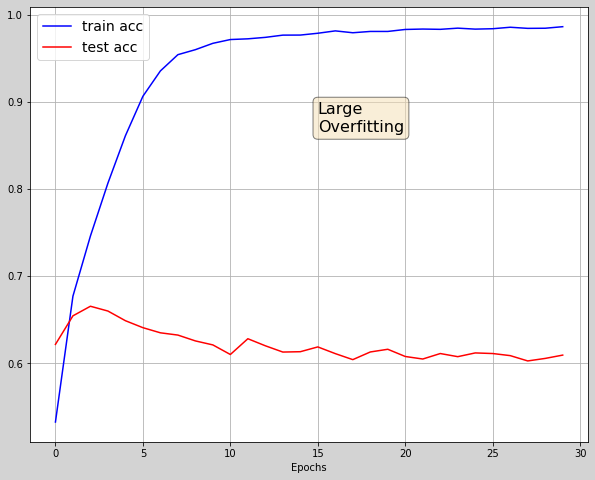

In [ ]:
import matplotlib.pyplot as plt

fig, ax = plt.subplots(figsize=(10,8))
fig.set_facecolor('lightgray')
plt.plot(history.history['accuracy'], 'b')
plt.plot(history.history['val_accuracy'], 'r')
plt.legend(['train acc', 'test acc'], fontsize=14)
ax.text(15, 0.9, 'Large\nOverfitting', fontsize=16,
        verticalalignment='top', bbox=dict(boxstyle='round', facecolor='wheat', alpha=0.5))
plt.xlabel('Epochs')
plt.grid(b=True)

#### A better model  
Use some additional layer types:
* `BatchNormalization()` (see [Normalization layers](https://keras.io/layers/normalization/)):
applies a transformation to the input batch that maintains the mean activation close to 0 and the activation standard deviation close to 1.  
* `Activation(f)` (see [Core layers](https://keras.io/layers/core/)):
Applies the activation function `f` to the input tensor  
* `AveragePooling2D(pool_size)` (see [Pooling layers](https://keras.io/layers/pooling/)):
Applies the transformation  
$y_{ij} = \frac{1}{p^2}\sum_{a=0}^{p-1} \sum_{b=0}^{p-1} x_{i+a,j+b}$  
to the input image $x_{ij}$ ($p$ is the `pool_size`)
* `Dropout(fraction)`: (see [Core layers](https://keras.io/layers/core/)):  
Randomly sets a `fraction` of input units to 0 at each update during training time, which helps prevent overfitting

In [ ]:
from tensorflow.keras.layers import BatchNormalization, Activation, AveragePooling2D, Dropout

def cnn_2(input_shape):
    x_in = Input(shape=input_shape)
    x = Conv2D(filters=16, kernel_size=3, padding="same")(x_in)
    x = BatchNormalization()(x)
    x = Activation('relu')(x)
    x = Dropout(rate=0.3)(x)
    x = Conv2D(filters=20, kernel_size=3, padding="same")(x)
    x = BatchNormalization()(x)
    x = Activation('relu')(x)
    x = Conv2D(filters=32, kernel_size=3, padding="same")(x)
    x = BatchNormalization()(x)
    x = Activation('relu')(x)
    print(x.shape)
    x = AveragePooling2D(pool_size=4)(x)
    print(x.shape)
    x = Flatten()(x)
    out = Dense(num_classes, activation='softmax')(x)
    model = Model(inputs=x_in, outputs=out)
    return model

In [ ]:
model2 = cnn_2(input_shape)
lr = 1e-3   # Learning rate
model2.compile(loss='sparse_categorical_crossentropy',
               optimizer=Adam(lr=lr),
               metrics=['accuracy'])
model2.summary()

(None, 32, 32, 32)
(None, 8, 8, 32)
Model: "model_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_2 (InputLayer)         [(None, 32, 32, 3)]       0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 32, 32, 16)        448       
_________________________________________________________________
batch_normalization (BatchNo (None, 32, 32, 16)        64        
_________________________________________________________________
activation (Activation)      (None, 32, 32, 16)        0         
_________________________________________________________________
dropout (Dropout)            (None, 32, 32, 16)        0         
_________________________________________________________________
conv2d_4 (Conv2D)            (None, 32, 32, 20)        2900      
_________________________________________________________________
batch_normalization_1 (

In [ ]:
max_epochs = 30
batch_size = 32

history2 = model2.fit(x=x_train, y=t_train,
                      validation_data=(x_test,t_test),
                      batch_size=batch_size,
                      epochs=max_epochs,
                      verbose=1)

Epoch 1/30
1563/1563 [==============================] - 9s 5ms/step - loss: 1.3485 - accuracy: 0.5190 - val_loss: 1.1243 - val_accuracy: 0.6117
Epoch 2/30
1563/1563 [==============================] - 9s 6ms/step - loss: 1.0342 - accuracy: 0.6384 - val_loss: 0.9831 - val_accuracy: 0.6507
Epoch 3/30
1563/1563 [==============================] - 9s 6ms/step - loss: 0.9288 - accuracy: 0.6750 - val_loss: 0.9196 - val_accuracy: 0.6785
Epoch 4/30
1563/1563 [==============================] - 8s 5ms/step - loss: 0.8710 - accuracy: 0.6973 - val_loss: 0.9123 - val_accuracy: 0.6848
Epoch 5/30
1563/1563 [==============================] - 9s 5ms/step - loss: 0.8326 - accuracy: 0.7107 - val_loss: 0.9306 - val_accuracy: 0.6819
Epoch 6/30
1563/1563 [==============================] - 8s 5ms/step - loss: 0.8005 - accuracy: 0.7211 - val_loss: 0.8923 - val_accuracy: 0.6963
Epoch 7/30
1563/1563 [==============================] - 8s 5ms/step - loss: 0.7713 - accuracy: 0.7322 - val_loss: 0.8867 - val_accuracy:

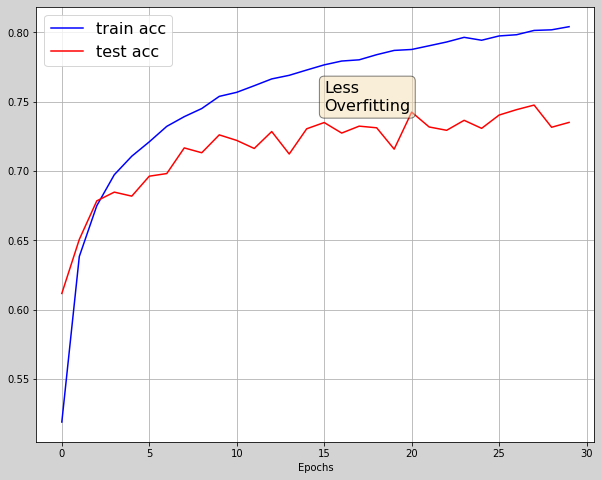

In [ ]:
fig, ax = plt.subplots(figsize=(10,8))
fig.set_facecolor('lightgray')
plt.plot(history2.history['accuracy'], 'b')
plt.plot(history2.history['val_accuracy'], 'r')
plt.legend(['train acc', 'test acc'], fontsize=16)
ax.text(15, 0.765, 'Less\nOverfitting', fontsize=16,
        verticalalignment='top', bbox=dict(boxstyle='round', facecolor='wheat', alpha=0.5))
plt.xlabel('Epochs')
plt.grid(b=True)

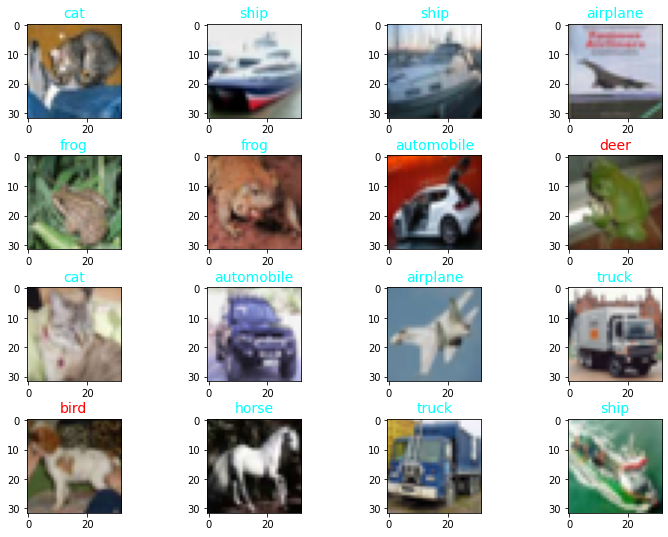

In [ ]:
prob_pred = model2.predict(x_test, batch_size=batch_size)
label_pred = np.argmax(prob_pred, axis=1)
plt.figure(figsize=(12,9))
plt.subplots_adjust(wspace=0.4, hspace=0.4)
for i in range(16):
    axes = plt.subplot(4,4,i+1)
    if label_pred[i]==t_test[i,0]:
        color = 'cyan'
    else:
        color = 'red'
    axes.set_title(class_names[label_pred[i]], fontdict={'fontsize':14, 'color':color})
    plt.imshow(xo_test[i])